In [ ]:
#======================================================#
#     LAB 9 - Support Vector Machine                   #
#     Author: SHIKHAR ASTHANA                          #
#     Roll No. : 2K22/AFI/24                           #
#     Subject: Machine Learning Lab (Kavinder Sir)     #
#======================================================#

In [ ]:
#importing the header files
import numpy as np
from sklearn import datasets
import matplotlib.pyplot as plt

In [1]:
#defining the SVM clas
class SVM:

    #initialising funciton - assign default values
    def __init__(self, learning_rate=0.001, lambda_param=0.01, n_iters=1000):
        self.lr = learning_rate
        self.lambda_param = lambda_param
        self.n_iters = n_iters
        self.w = None
        self.b = None

    #apply gradient descent for SVM
    def fit(self, X, y):
        n_samples, n_features = X.shape

        y_ = np.where(y <= 0, -1, 1)

        # init weights
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.n_iters):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.lr * (2 * self.lambda_param * self.w)
                else:
                    self.w -= self.lr * (2 * self.lambda_param * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.lr * y_[idx]


    #perform prediciton
    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)

In [2]:
#load the iris dataset from predefined library
iris = datasets.load_iris()
X = iris.data[:100,:2]
y = iris.target[:100]
y[y==0] = -1 # Convert 0 labels to -1

# Shuffle iris dataset data
np.random.seed(123)
shuffle_idx = np.random.permutation(len(y))
X = X[shuffle_idx]
y = y[shuffle_idx]

# Split iris dataset into training and test sets
train_size = 0.8
split_idx = int(len(y) * train_size)
X_train = X[:split_idx]
X_test = X[split_idx:]
y_train = y[:split_idx]
y_test = y[split_idx:]

#actually initialising the SVM class we created
clf = SVM()
clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

In [3]:
#defining function to calculate the accuracy
#Number of correctly predicted/total
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy

print("SVM classification accuracy", accuracy(y_test, predictions))

SVM classification accuracy 1.0


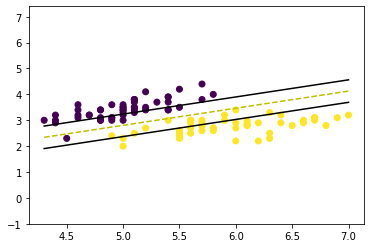

In [4]:
#function to create a graph to visualise the SVM
def visualize_svm():
        def get_hyperplane_value(x, w, b, offset):
            return (-w[0] * x + b + offset) / w[1]

        fig = plt.figure()
        ax = fig.add_subplot(1, 1, 1)
        plt.scatter(X[:, 0], X[:, 1], marker="o", c=y)

        x0_1 = np.amin(X[:, 0])
        x0_2 = np.amax(X[:, 0])

        x1_1 = get_hyperplane_value(x0_1, clf.w, clf.b, 0)
        x1_2 = get_hyperplane_value(x0_2, clf.w, clf.b, 0)

        x1_1_m = get_hyperplane_value(x0_1, clf.w, clf.b, -1)
        x1_2_m = get_hyperplane_value(x0_2, clf.w, clf.b, -1)

        x1_1_p = get_hyperplane_value(x0_1, clf.w, clf.b, 1)
        x1_2_p = get_hyperplane_value(x0_2, clf.w, clf.b, 1)

        ax.plot([x0_1, x0_2], [x1_1, x1_2], "y--")
        ax.plot([x0_1, x0_2], [x1_1_m, x1_2_m], "k")
        ax.plot([x0_1, x0_2], [x1_1_p, x1_2_p], "k")

        x1_min = np.amin(X[:, 1])
        x1_max = np.amax(X[:, 1])
        ax.set_ylim([x1_min - 3, x1_max + 3])

        plt.show()

    visualize_svm()